# Exercises in neural network and deep learning II

In [517]:
"""%pip install numpy==2.0.1 ## had to hard code the numpy version, even though my python version is 3.10
import numpy
numpy.version.version""" 
xx=1 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow import keras
from tensorflow.keras import layers, regularizers

## Exercise 1

In this exercise, we will use the titanic dataset to build a neural network classifier for the target variable `Survived`. In this exercise, all the necessary steps are broken down to small individual task you should do. So, do the following tasks:

1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.
2. For the columns "Age" and "Fare", replace the missing values with the column's mean.
3. Turn the variables "Pclass" and "Sex" into dummy variables.
4. Do a train-test split of the data
5. Scale the X training dataset, using the standard scaler.
6. Transform the X test dataset with the same scaler fitted in task 5.
7. Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.
8. Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.
9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.
10. Plot the training and validation loss and decide on a best number of epochs.
11. Rebuild and retrain the model for the number of epochs decided in task 10 above.
12. Evaluate the model on the test dataset to get the test accuracy.
13. Calculate precision, recall, and f1-score for the model on the test dataset.
14. Plot the Confusion matrix for the test dataset.

### 1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.

In [2]:
df = pd.read_csv("../Notebooks and data-15/titanic_survival_data.csv")

In [3]:
X = df[["Pclass", "Sex", "Age", "Fare"]]
X.head(5)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.250
1,1,female,38.0,712.833
2,3,female,26.0,7.925
3,1,female,35.0,53.100
4,3,male,35.0,8.050


In [4]:
y = df["Survived"]

### 2. For the columns "Age" and "Fare", replace the missing values with the column's mean.

In [5]:
X.isna().sum()

Pclass      0
Sex         0
Age       177
Fare       23
dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")
X["Age"].fillna((X["Age"].mean()), inplace=True) 

In [7]:
X["Fare"].fillna((X["Fare"].mean()), inplace=True)

### 3. Turn the variables "Pclass" and "Sex" into dummy variables.

In [8]:
X = X.join(pd.get_dummies(X["Pclass"], drop_first=True, dtype=int))
X = X.join(pd.get_dummies(X["Sex"], drop_first=True, dtype=int))
X = X.drop(columns = ["Pclass", "Sex"])

In [9]:
X

,Age,Fare,2,3,male
0,22.000000,7.250,0,1,1
1,38.000000,712.833,0,0,0
2,26.000000,7.925,0,1,0
3,35.000000,53.100,0,0,0
4,35.000000,8.050,0,1,1
...,...,...,...,...,...
886,27.000000,13.000,1,0,1
887,19.000000,30.000,0,0,0
888,29.679272,23.450,0,1,0
889,26.000000,30.000,0,0,1


### 4. Do a train-test split of the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

### 5. Scale the X training dataset, using the standard scaler

In [18]:
X_train.columns = X_train.columns.astype(str) # all the columns have to be strings

In [19]:
X_test.columns = X_test.columns.astype(str) # all the columns have to be strings

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[-2.02253932, -0.46043775,  1.97781817, -1.11427588,  0.72464761],
       [ 0.00825117,  1.05606672, -0.50560765,  0.89744382,  0.72464761],
       [-0.50016606, -0.53002223, -0.50560765,  0.89744382, -1.3799811 ],
       ...,
       [-0.80464072, -0.53757528, -0.50560765,  0.89744382,  0.72464761],
       [ 0.00825117, -0.48132916, -0.50560765,  0.89744382, -1.3799811 ],
       [-0.65240339, -0.07608717, -0.50560765,  0.89744382,  0.72464761]])

### 6. Transform the X test dataset with the same scaler fitted in task 5.

In [22]:
scaler.transform(X_test)

array([[ 0.1849019 , -0.53114715, -0.50560765,  0.89744382,  0.72464761],
       [-0.34792874,  0.39321753, -0.50560765, -1.11427588, -1.3799811 ],
       [-0.72852205, -0.53002223, -0.50560765,  0.89744382,  0.72464761],
       ...,
       [ 0.33713923, -0.52921871, -0.50560765,  0.89744382,  0.72464761],
       [ 0.00825117, -0.52921871, -0.50560765,  0.89744382,  0.72464761],
       [ 0.00825117, -0.53452192, -0.50560765,  0.89744382, -1.3799811 ]])

### 7. Turn the training and test data (both Xs and ys) into numpy arrays using the method .to_numpy().

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
X_test

array([[ 32.        ,   7.75      ,   0.        ,   1.        ,
          1.        ],
       [ 25.        , 151.55      ,   0.        ,   0.        ,
          0.        ],
       [ 20.        ,   7.925     ,   0.        ,   1.        ,
          1.        ],
       ...,
       [ 34.        ,   8.05      ,   0.        ,   1.        ,
          1.        ],
       [ 29.67927171,   8.05      ,   0.        ,   1.        ,
          1.        ],
       [ 29.67927171,   7.225     ,   0.        ,   1.        ,
          0.        ]])

### 8. Create a neural network model with two hidden dense layers with 16 neurons in each and the relu activation function. The final output layer should have one neuron and the sigmoid activation function.

In [25]:
def setup_model(loss_func="binary_crossentropy", output_layer_activation="sigmoid"):
    model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation=output_layer_activation)
    ])

    model.compile(optimizer="rmsprop",
              loss=loss_func,
              metrics=["accuracy"])
    return model

In [26]:
titanic_model = setup_model()

### 9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument validation_split=0.2 to the fit method.

In [27]:
def fit_model(model, X_train, y_train, _epochs=50, _batch_size=64, _verbose=1):
    history = model.fit(X_train,
                        y_train,
                        epochs=_epochs,
                        batch_size=_batch_size,
                        validation_split=0.2,
                        verbose=_verbose)

    return history, model

In [28]:
titanic_history, titanic_model = fit_model(titanic_model, X_train, y_train, 80, 64)

Epoch 1/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4134 - loss: 0.7363 - val_accuracy: 0.6119 - val_loss: 0.6832
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5656 - loss: 0.6838 - val_accuracy: 0.7239 - val_loss: 0.6654
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6721 - loss: 0.6551 - val_accuracy: 0.7388 - val_loss: 0.6467
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7454 - loss: 0.6281 - val_accuracy: 0.7463 - val_loss: 0.6321
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7387 - loss: 0.6172 - val_accuracy: 0.7463 - val_loss: 0.6195
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7829 - loss: 0.5881 - val_accuracy: 0.7463 - val_loss: 0.6066
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7963 - loss: 0.5702 - val_accuracy: 0.7612 - val_loss: 0.5985
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7931 - loss: 0.5567 - val_accuracy: 0.7537 - val_loss: 0.5901
Epoch

In [29]:
score = titanic_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.301876068115234
Test accuracy: 0.6502242088317871


### 10. Plot the training and validation loss and decide on a best number of epochs.

In [30]:
def plot_train_validation(history, metrics):
    acc = history.history[metrics[0]]
    epochs = range(1, len(acc) + 1)
    for metric in metrics:  
        val_acc = history.history["val_" + metric]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        plt.plot(epochs, acc, label="Training " + metric)
        plt.plot(epochs, val_acc, label="Validation " + metric)
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.figure()

    acc = history.history[metric]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

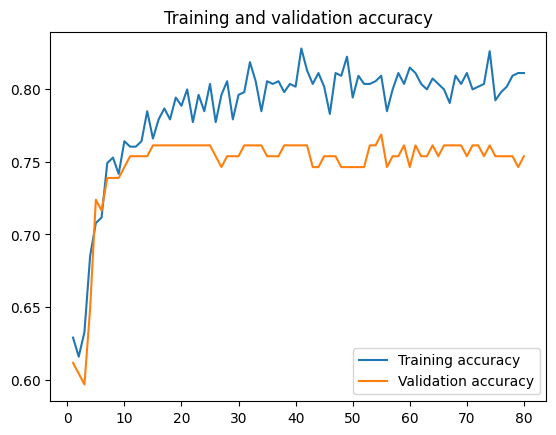

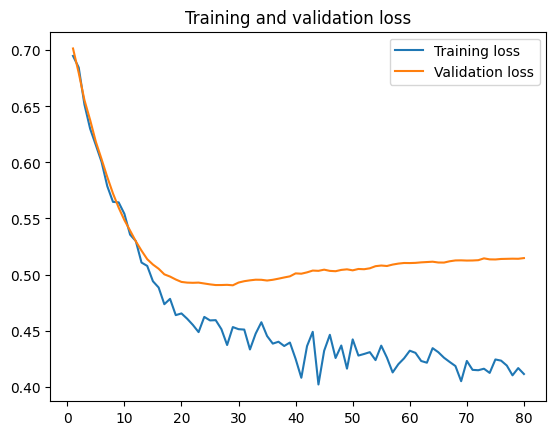

In [541]:
plot_train_validation(titanic_history, ["accuracy"])

### 11. Rebuild and retrain the model for the number of epochs decided in task 10 above.

In [31]:
model = setup_model()

In [32]:
import shap

In [33]:
explainer = shap.Explainer(model.predict, X_test)

In [34]:
shap_values = explainer(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
16/16 ━━━━━━━━━━━━━━━━━━━━

ExactExplainer explainer:  11%|█         | 24/223 [00:00<?, ?it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  12%|█▏        | 26/223 [00:10<00:15, 12.86it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 28/223 [00:10<00:29,  6.60it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 29/223 [00:10<00:30,  6.42it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  13%|█▎        | 30/223 [00:10<00:30,  6.32it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


ExactExplainer explainer:  14%|█▍        | 31/223 [00:11<00:30,  6.29it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 32/223 [00:11<00:31,  6.09it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  15%|█▍        | 33/223 [00:11<00:33,  5.75it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  15%|█▌        | 34/223 [00:11<00:32,  5.87it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


ExactExplainer explainer:  16%|█▌        | 35/223 [00:11<00:31,  5.88it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  16%|█▌        | 36/223 [00:11<00:31,  5.93it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  17%|█▋        | 37/223 [00:12<00:30,  6.10it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  17%|█▋        | 38/223 [00:12<00:29,  6.26it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  17%|█▋        | 39/223 [00:12<00:28,  6.44it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 40/223 [00:12<00:29,  6.28it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 41/223 [00:12<00:29,  6.18it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  19%|█▉        | 42/223 [00:12<00:28,  6.29it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 43/223 [00:13<00:29,  6.20it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


ExactExplainer explainer:  20%|█▉        | 44/223 [00:13<00:28,  6.26it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  20%|██        | 45/223 [00:13<00:28,  6.31it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  21%|██        | 46/223 [00:13<00:28,  6.15it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  21%|██        | 47/223 [00:13<00:28,  6.19it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 48/223 [00:13<00:27,  6.26it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


ExactExplainer explainer:  22%|██▏       | 49/223 [00:14<00:27,  6.22it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  22%|██▏       | 50/223 [00:14<00:27,  6.26it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  23%|██▎       | 51/223 [00:14<00:28,  6.10it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  23%|██▎       | 52/223 [00:14<00:27,  6.24it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  24%|██▍       | 53/223 [00:14<00:26,  6.36it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  24%|██▍       | 54/223 [00:14<00:26,  6.45it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  25%|██▍       | 55/223 [00:14<00:26,  6.29it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  25%|██▌       | 56/223 [00:15<00:26,  6.40it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▌       | 57/223 [00:15<00:25,  6.50it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▌       | 58/223 [00:15<00:25,  6.53it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▋       | 59/223 [00:15<00:24,  6.58it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  27%|██▋       | 60/223 [00:15<00:25,  6.51it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


ExactExplainer explainer:  27%|██▋       | 61/223 [00:15<00:25,  6.40it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 62/223 [00:16<00:24,  6.48it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 63/223 [00:16<00:25,  6.16it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step


ExactExplainer explainer:  29%|██▊       | 64/223 [00:16<00:25,  6.32it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  29%|██▉       | 65/223 [00:16<00:25,  6.29it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|██▉       | 66/223 [00:16<00:24,  6.34it/s]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|███       | 67/223 [00:16<00:25,  6.13it/s]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


ExactExplainer explainer:  30%|███       | 68/223 [00:17<00:25,  6.17it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  31%|███       | 69/223 [00:17<00:24,  6.33it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  31%|███▏      | 70/223 [00:17<00:24,  6.14it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  32%|███▏      | 71/223 [00:17<00:24,  6.12it/s]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 72/223 [00:17<00:24,  6.08it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  33%|███▎      | 73/223 [00:17<00:23,  6.31it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


ExactExplainer explainer:  33%|███▎      | 74/223 [00:18<00:24,  6.19it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  34%|███▎      | 75/223 [00:18<00:25,  5.81it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▍      | 76/223 [00:18<00:25,  5.79it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


ExactExplainer explainer:  35%|███▍      | 77/223 [00:18<00:24,  5.92it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  35%|███▍      | 78/223 [00:18<00:24,  5.98it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  35%|███▌      | 79/223 [00:18<00:23,  6.13it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  36%|███▌      | 80/223 [00:19<00:22,  6.23it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


ExactExplainer explainer:  36%|███▋      | 81/223 [00:19<00:22,  6.38it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  37%|███▋      | 82/223 [00:19<00:22,  6.31it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  37%|███▋      | 83/223 [00:19<00:23,  5.84it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  38%|███▊      | 84/223 [00:19<00:22,  6.05it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  38%|███▊      | 85/223 [00:19<00:22,  6.09it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  39%|███▊      | 86/223 [00:19<00:22,  6.21it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  39%|███▉      | 87/223 [00:20<00:21,  6.31it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


ExactExplainer explainer:  39%|███▉      | 88/223 [00:20<00:21,  6.37it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


ExactExplainer explainer:  40%|███▉      | 89/223 [00:20<00:20,  6.52it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


ExactExplainer explainer:  40%|████      | 90/223 [00:20<00:20,  6.55it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  41%|████      | 91/223 [00:20<00:20,  6.59it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  41%|████▏     | 92/223 [00:20<00:20,  6.39it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


ExactExplainer explainer:  42%|████▏     | 93/223 [00:21<00:20,  6.47it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 94/223 [00:21<00:21,  6.08it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  43%|████▎     | 95/223 [00:21<00:21,  5.95it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  43%|████▎     | 96/223 [00:21<00:20,  6.14it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  43%|████▎     | 97/223 [00:21<00:20,  6.27it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▍     | 98/223 [00:21<00:20,  6.06it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


ExactExplainer explainer:  44%|████▍     | 99/223 [00:22<00:20,  6.06it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  45%|████▍     | 100/223 [00:22<00:20,  6.14it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


ExactExplainer explainer:  45%|████▌     | 101/223 [00:22<00:20,  6.09it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


ExactExplainer explainer:  46%|████▌     | 102/223 [00:22<00:19,  6.27it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


ExactExplainer explainer:  46%|████▌     | 103/223 [00:22<00:19,  6.28it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  47%|████▋     | 104/223 [00:22<00:18,  6.40it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  47%|████▋     | 105/223 [00:23<00:18,  6.38it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


ExactExplainer explainer:  48%|████▊     | 106/223 [00:23<00:19,  6.06it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  48%|████▊     | 107/223 [00:23<00:18,  6.23it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


ExactExplainer explainer:  48%|████▊     | 108/223 [00:23<00:18,  6.36it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  49%|████▉     | 109/223 [00:23<00:17,  6.45it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


ExactExplainer explainer:  49%|████▉     | 110/223 [00:23<00:17,  6.50it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step


ExactExplainer explainer:  50%|████▉     | 111/223 [00:23<00:17,  6.22it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|█████     | 112/223 [00:24<00:16,  6.56it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  51%|█████     | 113/223 [00:24<00:16,  6.52it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  51%|█████     | 114/223 [00:24<00:16,  6.59it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▏    | 115/223 [00:24<00:16,  6.59it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▏    | 116/223 [00:24<00:16,  6.68it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


ExactExplainer explainer:  52%|█████▏    | 117/223 [00:24<00:16,  6.59it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


ExactExplainer explainer:  53%|█████▎    | 118/223 [00:25<00:17,  5.91it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 119/223 [00:25<00:17,  6.04it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  54%|█████▍    | 120/223 [00:25<00:17,  5.89it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


ExactExplainer explainer:  54%|█████▍    | 121/223 [00:25<00:17,  5.88it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


ExactExplainer explainer:  55%|█████▍    | 122/223 [00:25<00:17,  5.93it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  55%|█████▌    | 123/223 [00:25<00:17,  5.80it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 124/223 [00:26<00:16,  5.91it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 125/223 [00:26<00:15,  6.17it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  57%|█████▋    | 126/223 [00:26<00:15,  6.41it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  57%|█████▋    | 127/223 [00:26<00:14,  6.50it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


ExactExplainer explainer:  57%|█████▋    | 128/223 [00:26<00:14,  6.56it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  58%|█████▊    | 129/223 [00:26<00:15,  6.09it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 130/223 [00:27<00:14,  6.30it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  59%|█████▊    | 131/223 [00:27<00:14,  6.37it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  59%|█████▉    | 132/223 [00:27<00:14,  6.44it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


ExactExplainer explainer:  60%|█████▉    | 133/223 [00:27<00:14,  6.14it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


ExactExplainer explainer:  60%|██████    | 134/223 [00:27<00:14,  6.15it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  61%|██████    | 135/223 [00:27<00:14,  6.06it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


ExactExplainer explainer:  61%|██████    | 136/223 [00:27<00:14,  6.11it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


ExactExplainer explainer:  61%|██████▏   | 137/223 [00:28<00:13,  6.43it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


ExactExplainer explainer:  62%|██████▏   | 138/223 [00:28<00:13,  6.41it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


ExactExplainer explainer:  62%|██████▏   | 139/223 [00:28<00:13,  6.33it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 140/223 [00:28<00:13,  5.99it/s]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 141/223 [00:28<00:13,  5.91it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▎   | 142/223 [00:29<00:14,  5.61it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  64%|██████▍   | 143/223 [00:29<00:15,  5.31it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▍   | 144/223 [00:29<00:14,  5.34it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▌   | 145/223 [00:29<00:14,  5.57it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▌   | 146/223 [00:29<00:13,  5.65it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  66%|██████▌   | 147/223 [00:29<00:12,  5.93it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▋   | 148/223 [00:30<00:12,  6.01it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 149/223 [00:30<00:12,  6.08it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 150/223 [00:30<00:11,  6.16it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  68%|██████▊   | 151/223 [00:30<00:12,  5.83it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 152/223 [00:30<00:11,  5.97it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step


ExactExplainer explainer:  69%|██████▊   | 153/223 [00:30<00:11,  6.17it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  69%|██████▉   | 154/223 [00:31<00:11,  6.20it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  70%|██████▉   | 155/223 [00:31<00:10,  6.22it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  70%|██████▉   | 156/223 [00:31<00:10,  6.18it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 157/223 [00:31<00:10,  6.35it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  71%|███████   | 158/223 [00:31<00:10,  6.45it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


ExactExplainer explainer:  71%|███████▏  | 159/223 [00:31<00:09,  6.52it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 160/223 [00:31<00:10,  6.09it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


ExactExplainer explainer:  72%|███████▏  | 161/223 [00:32<00:10,  5.94it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 162/223 [00:32<00:10,  5.67it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 163/223 [00:32<00:10,  5.96it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▎  | 164/223 [00:32<00:09,  6.15it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


ExactExplainer explainer:  74%|███████▍  | 165/223 [00:32<00:09,  6.20it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▍  | 166/223 [00:32<00:09,  6.22it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


ExactExplainer explainer:  75%|███████▍  | 167/223 [00:33<00:08,  6.36it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


ExactExplainer explainer:  75%|███████▌  | 168/223 [00:33<00:08,  6.46it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


ExactExplainer explainer:  76%|███████▌  | 169/223 [00:33<00:08,  6.40it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


ExactExplainer explainer:  76%|███████▌  | 170/223 [00:33<00:08,  6.31it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  77%|███████▋  | 171/223 [00:33<00:08,  6.45it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  77%|███████▋  | 172/223 [00:33<00:08,  6.04it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 173/223 [00:34<00:08,  5.82it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 174/223 [00:34<00:08,  5.96it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 175/223 [00:34<00:07,  6.07it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  79%|███████▉  | 176/223 [00:34<00:07,  6.27it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  79%|███████▉  | 177/223 [00:34<00:07,  6.40it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


ExactExplainer explainer:  80%|███████▉  | 178/223 [00:34<00:07,  6.35it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


ExactExplainer explainer:  80%|████████  | 179/223 [00:35<00:07,  6.08it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


ExactExplainer explainer:  81%|████████  | 180/223 [00:35<00:06,  6.16it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  81%|████████  | 181/223 [00:35<00:06,  6.25it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 182/223 [00:35<00:06,  6.39it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  82%|████████▏ | 183/223 [00:35<00:06,  6.27it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  83%|████████▎ | 184/223 [00:35<00:06,  5.65it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


ExactExplainer explainer:  83%|████████▎ | 185/223 [00:36<00:06,  5.49it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  83%|████████▎ | 186/223 [00:36<00:06,  5.63it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


ExactExplainer explainer:  84%|████████▍ | 187/223 [00:36<00:06,  5.82it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 188/223 [00:36<00:05,  5.94it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  85%|████████▍ | 189/223 [00:36<00:05,  6.15it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


ExactExplainer explainer:  85%|████████▌ | 190/223 [00:36<00:05,  6.29it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  86%|████████▌ | 191/223 [00:37<00:04,  6.41it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▌ | 192/223 [00:37<00:04,  6.51it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 193/223 [00:37<00:04,  6.60it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


ExactExplainer explainer:  87%|████████▋ | 194/223 [00:37<00:04,  6.32it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  87%|████████▋ | 195/223 [00:37<00:04,  6.04it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


ExactExplainer explainer:  88%|████████▊ | 196/223 [00:37<00:04,  5.91it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


ExactExplainer explainer:  88%|████████▊ | 197/223 [00:38<00:04,  6.04it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 198/223 [00:38<00:03,  6.28it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  89%|████████▉ | 199/223 [00:38<00:03,  6.32it/s]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


ExactExplainer explainer:  90%|████████▉ | 200/223 [00:38<00:03,  6.38it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


ExactExplainer explainer:  90%|█████████ | 201/223 [00:38<00:03,  6.45it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  91%|█████████ | 202/223 [00:38<00:03,  6.39it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 203/223 [00:38<00:03,  6.47it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  91%|█████████▏| 204/223 [00:39<00:02,  6.54it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 205/223 [00:39<00:03,  5.81it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 206/223 [00:39<00:02,  6.12it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


ExactExplainer explainer:  93%|█████████▎| 207/223 [00:39<00:02,  6.15it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  93%|█████████▎| 208/223 [00:39<00:02,  6.30it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


ExactExplainer explainer:  94%|█████████▎| 209/223 [00:39<00:02,  6.43it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 210/223 [00:40<00:02,  6.30it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▍| 211/223 [00:40<00:01,  6.21it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▌| 212/223 [00:40<00:01,  6.21it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▌| 213/223 [00:40<00:01,  6.24it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  96%|█████████▌| 214/223 [00:40<00:01,  5.83it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▋| 215/223 [00:40<00:01,  5.72it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 216/223 [00:41<00:01,  5.97it/s]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  97%|█████████▋| 217/223 [00:41<00:00,  6.06it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 218/223 [00:41<00:00,  6.20it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 219/223 [00:41<00:00,  6.26it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


ExactExplainer explainer:  99%|█████████▊| 220/223 [00:41<00:00,  6.25it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 221/223 [00:41<00:00,  6.15it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step


ExactExplainer explainer: 100%|█████████▉| 222/223 [00:42<00:00,  6.35it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer: 100%|██████████| 223/223 [00:42<00:00,  6.36it/s]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step


ExactExplainer explainer: 224it [00:42,  4.72it/s]                         


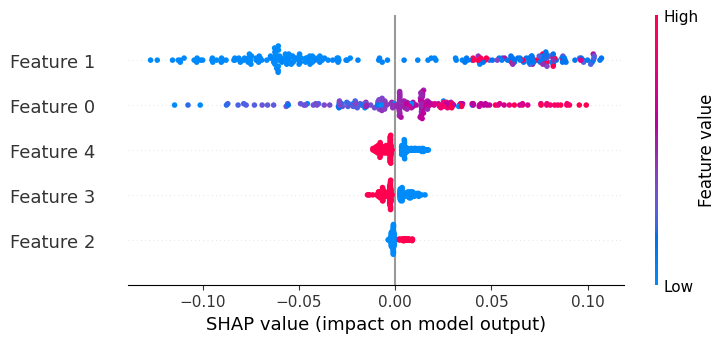

In [ ]:
shap.plots.beeswarm(shap_values) #Fare, Age, Sex, class3, class2: is what the features are for the shap model, # this does the same: shap.summary_plot(shap_values)

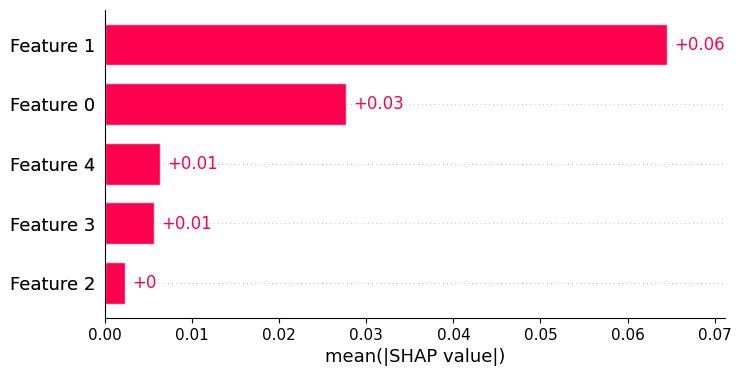

In [36]:
shap.plots.bar(shap_values)

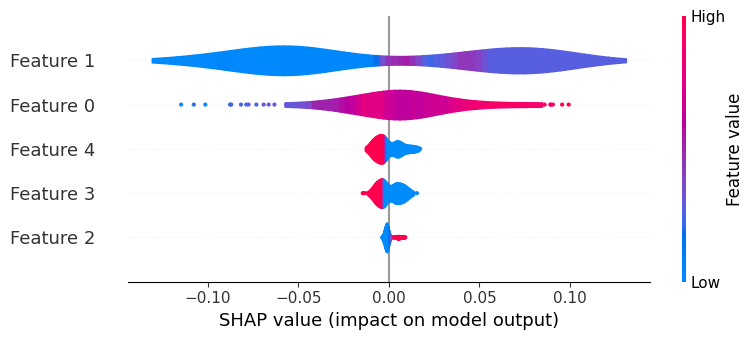

In [38]:
shap.summary_plot(shap_values, plot_type='violin')

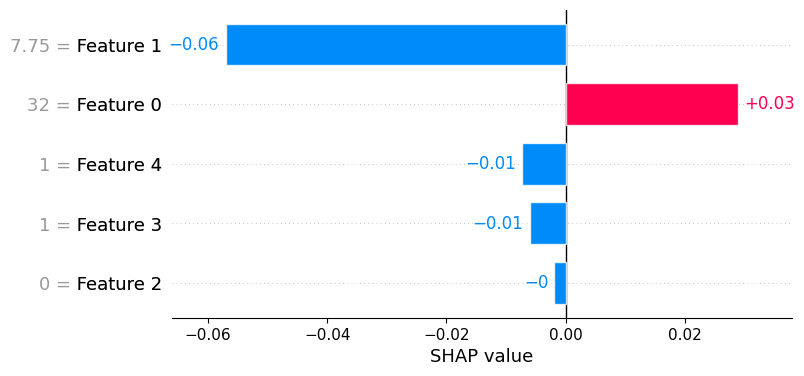

In [39]:
shap.plots.bar(shap_values[0])

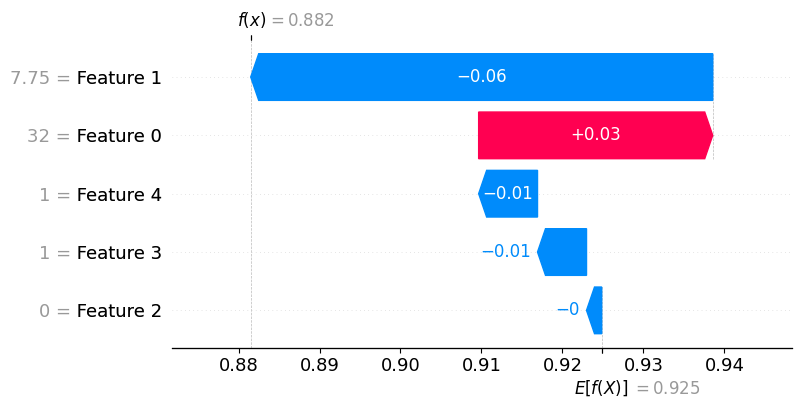

In [43]:
shap.plots.waterfall(shap_values[0])

In [543]:
titanic_history, titanic_model = fit_model(titanic_model, X_train, y_train, 20, 64)  ## at 20 validation loss had it's lowest loss TODO, dobbel check that claim

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7980 - loss: 0.4465 - val_accuracy: 0.7537 - val_loss: 0.5141
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8366 - loss: 0.3870 - val_accuracy: 0.7463 - val_loss: 0.5147
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8149 - loss: 0.4228 - val_accuracy: 0.7463 - val_loss: 0.5141
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8068 - loss: 0.4101 - val_accuracy: 0.7313 - val_loss: 0.5148
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8127 - loss: 0.4171 - val_accuracy: 0.7463 - val_loss: 0.5147
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7961 - loss: 0.4142 - val_accuracy: 0.7388 - val_loss: 0.5162
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8119 - loss: 0.4120 - val_accuracy: 0.7463 - val_loss: 0.5153
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7917 - loss: 0.4109 - val_accuracy: 0.7463 - val_loss: 0.5159
Epoch 9

### 12. Evaluate the model on the test dataset to get the test accuracy.

In [544]:
score = titanic_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 4.380754470825195
Test accuracy: 0.605381190776825


    The accuracy is 3% higher
    The loss is significantly lower

### 13. Calculate precision, recall, and f1-score for the model on the test dataset.

In [545]:
titanic_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

titanic_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["precision", "recall"]) 

In [546]:
titanic_history, titanic_model = fit_model(titanic_model, X_train, y_train, 20, 64)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.8364 - precision: 0.3233 - recall: 0.9624 - val_loss: 0.7089 - val_precision: 0.4231 - val_recall: 0.9649
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7490 - precision: 0.3575 - recall: 0.9625 - val_loss: 0.6773 - val_precision: 0.4508 - val_recall: 0.9649
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7135 - precision: 0.3742 - recall: 0.8924 - val_loss: 0.6534 - val_precision: 0.5048 - val_recall: 0.9298
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6727 - precision: 0.4363 - recall: 0.8563 - val_loss: 0.6334 - val_precision: 0.6486 - val_recall: 0.8421
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6463 - precision: 0.5742 - recall: 0.8003 - val_loss: 0.6148 - val_precision: 0.6719 - val_recall: 0.7544
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6206 - precision: 0.6172 - recall: 0.7321 - val_loss: 0.5980 - val_precision: 0.6786 - val_recall: 0.6667
Epoch 7/20
9/9 

In [547]:
y_pred = titanic_model.predict(X_test)
y_pred = y_pred.flatten()
y_test = np.float32(y_test) # some versions it is float64 and needs to be converted to float32

score = titanic_model.evaluate(X_test, y_test, verbose=0)

print("Test loss:     ", score[0])
print("Test precision:", score[1])
print("Test recall:   ", score[2])
print("Test f1 score: ", f1_score(y_test, y_pred.round())) # removed y_pred.round().numpy()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test loss:      3.8163654804229736
Test precision: 0.6521739363670349
Test recall:    0.32608696818351746
Test f1 score:  0.43478260869565216


### 14. Plot the Confusion matrix for the test dataset.

In [548]:
y_pred = titanic_model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [549]:
y_pred = y_pred.flatten()

In [550]:
y_test = np.float32(y_test) # some versions it is float64 and needs to be converted to float32

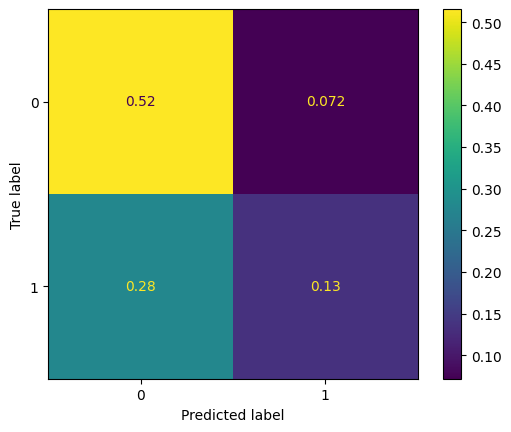

In [551]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred.round(), normalize='all')).plot()
plt.show()

    Not great at predicting true positives, really awful results

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [552]:
df_adult = pd.read_csv("../Notebooks and data-15/adult.csv")
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Data cleaning and transformation # TODO, there is a name for this

In [553]:
df_adult = df_adult.replace({"<=50K.": "<=50K", ">50K.": ">50K"})
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [554]:
print(df_adult.isna().sum())

df_adult = df_adult.dropna()

print(df_adult.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [555]:
df_adult = df_adult.join(pd.get_dummies(df_adult["workclass"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["education"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["sex"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["income"], drop_first=True, dtype=int)) # could turn it into simple binary

df_adult = df_adult.drop(columns = ["income", "workclass", "education", "education-num", "occupation", "race", "capital-loss", "fnlwgt", "marital-status", "relationship", "sex", "native-country"])

In [556]:
df_adult

,age,capital-gain,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Male,>50K
0,39,2174,40,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,50,0,13,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,38,0,40,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,0,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,0,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48837,39,0,36,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
48839,38,0,50,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48840,44,5455,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [557]:
X_adult = df_adult.drop(columns = [">50K"]) # dropping income >50K
y_adult = df_adult[">50K"]

### Training preperation # TODO, again there is a better name for this

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult, test_size=0.25, random_state=17)

In [559]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [560]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

### Model training

In [561]:
adult_model = setup_model()

In [562]:
adult_history, adult_model = fit_model(adult_model, X_train, y_train, 80, 128)

Epoch 1/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6626 - loss: 0.6226 - val_accuracy: 0.7987 - val_loss: 0.4291
Epoch 2/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4467 - val_accuracy: 0.8124 - val_loss: 0.4113
Epoch 3/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8067 - loss: 0.4256 - val_accuracy: 0.8202 - val_loss: 0.4030
Epoch 4/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.4165 - val_accuracy: 0.8246 - val_loss: 0.3971
Epoch 5/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8096 - loss: 0.4135 - val_accuracy: 0.8267 - val_loss: 0.3956
Epoch 6/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8157 - loss: 0.4003 - val_accuracy: 0.8277 - val_loss: 0.3927
Epoch 7/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8204 - loss: 0.4012 - val_accuracy: 0.8275 - val_loss: 0.3912
Epoch 8/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8177 - loss: 0.4010 - val_accuracy: 0.

In [563]:
score = adult_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) # 80, 128

Test loss: 0.39094218611717224
Test accuracy: 0.8261380791664124


#### Test loss: 185.87144470214844 : 50 1024
#### Test accuracy: 0.7739794850349426

#### Test loss: 234.88973999023438 : 50 512
#### Test accuracy: 0.28019484877586365

Test loss: 497.15032958984375 # 50, 64
Test accuracy: 0.6379136443138123

#### Test loss: 386.44134521484375 : 100, 256
#### Test accuracy: 0.7739794850349426

#### Test loss: 411.5776062011719 : 100 64
#### Test accuracy: 0.7709558010101318

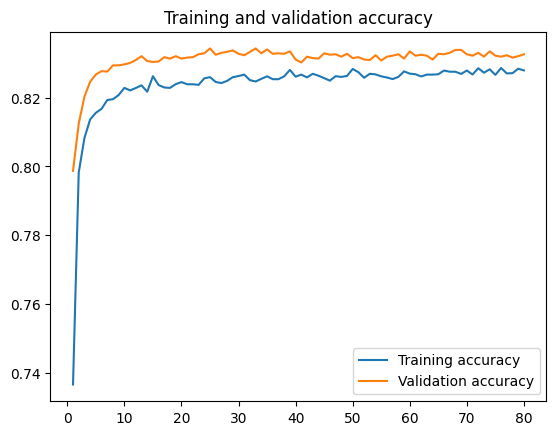

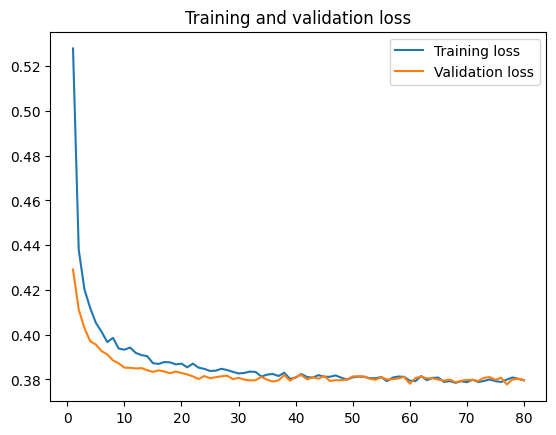

In [564]:
plot_train_validation(adult_history, ["accuracy"])

## Exercise 3

Based on the **AmesHousing dataset** from the class on regression, make a deep learning regression model to predict the sales price variable.

In [565]:
df_ames = pd.read_csv("../Notebooks and data-15/AmesHousing.csv")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


### Data cleaning and transformation # TODO, there is a name for this

In [566]:
df_ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [567]:
# gives much worse result
#df_ames = df_ames[["Lot Area", "Misc Val", "Yr Sold", "Garage Area", "Bldg Type", "Sale Type", "Sale Condition", "SalePrice"]].copy() 
df_ames = df_ames[["Lot Area", "Misc Val", "Yr Sold", "Bldg Type", "Sale Type", "Sale Condition", "SalePrice"]].copy()

In [568]:
df_ames = df_ames.join(pd.get_dummies(df_ames["Sale Type"], drop_first=True, dtype=int))
df_ames = df_ames.join(pd.get_dummies(df_ames["Sale Condition"], drop_first=True, dtype=int))
df_ames = df_ames.join(pd.get_dummies(df_ames["Bldg Type"], drop_first=True, dtype=int))

df_ames = df_ames.drop(columns = ["Sale Type", "Sale Condition", "Bldg Type"])

In [569]:
df_ames

,Lot Area,Misc Val,Yr Sold,SalePrice,CWD,Con,ConLD,ConLI,ConLw,New,...,WD,AdjLand,Alloca,Family,Normal,Partial,2fmCon,Duplex,Twnhs,TwnhsE
0,31770,0,2010,215000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,11622,0,2010,105000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,14267,12500,2010,172000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,11160,0,2010,244000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,13830,0,2010,189900,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,0,2006,142500,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2926,8885,0,2006,131000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2927,10441,700,2006,132000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2928,10010,0,2006,170000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [570]:
X_ames = df_ames.drop(columns = "SalePrice")
y_ames = df_ames["SalePrice"]

### Training preperation # TODO, again there is a better name for this

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X_ames, y_ames, test_size=0.2, random_state=42)

In [572]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [573]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [574]:
X_train

array([[ 0.03380992, -0.09315005,  0.91661939, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [ 2.30708197, -0.09315005,  0.91661939, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [-0.03551382, -0.09315005, -0.6044821 , ...,  5.21928768,
        -0.18429757, -0.29614695],
       ...,
       [-0.16608596, -0.09315005,  0.15606865, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [-0.35032808, -0.09315005,  0.15606865, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [-0.36374558, -0.09315005,  0.91661939, ..., -0.19159703,
        -0.18429757, -0.29614695]])

### Model training

In [575]:
def setup_regression_model():
    model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    # they have no significant impact on the result, altough they make the training time be faster, though hardly needed for this small data set
    #layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    #layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
    ])

    model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])
    return model

In [576]:
ames_model = setup_regression_model()

In [577]:
ames_history, ames_model = fit_model(ames_model, X_train, y_train, 100, 64, 0)

In [578]:
score = ames_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1]) 

Test loss: 6121687552.0
Test mae: 54700.22265625


#### Test loss: 7626186752.0 : dense 32, 32, 32
#### Test mae: 59875.6640625 

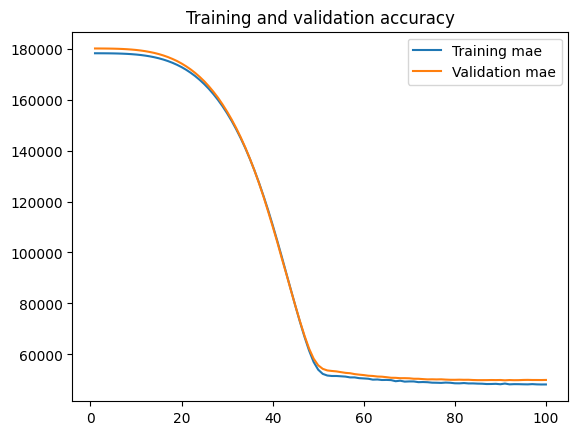

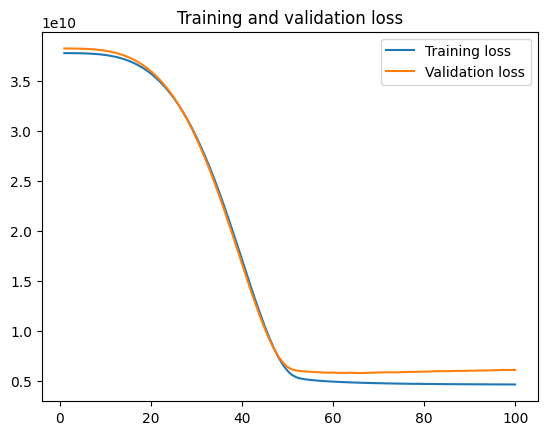

In [579]:
plot_train_validation(ames_history, ["mae"])

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 38558576640.0000 - mae: 178703.5469 - val_loss: 38209028096.0000 - val_mae: 180084.5781
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37057454080.0000 - mae: 177072.3438 - val_loss: 38206627840.0000 - val_mae: 180078.2656
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35629686784.0000 - mae: 174122.9375 - val_loss: 38201487360.0000 - val_mae: 180064.9219
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39680880640.0000 - mae: 181700.4375 - val_loss: 38192275456.0000 - val_mae: 180041.1719
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37804007424.0000 - mae: 178026.5938 - val_loss: 38177574912.0000 - val_mae: 180003.3438
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38495715328.0000 - mae: 178646.5781 - val_loss: 38155100160.0000 - val_mae: 179945.8906
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37048131584.0000 - mae: 176734.0469 - val_loss: 38122237952.0000 -

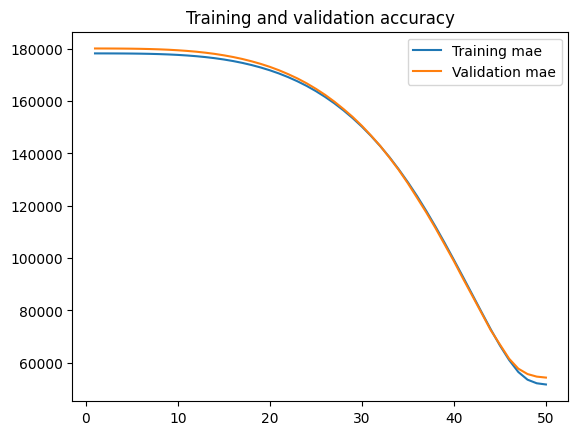

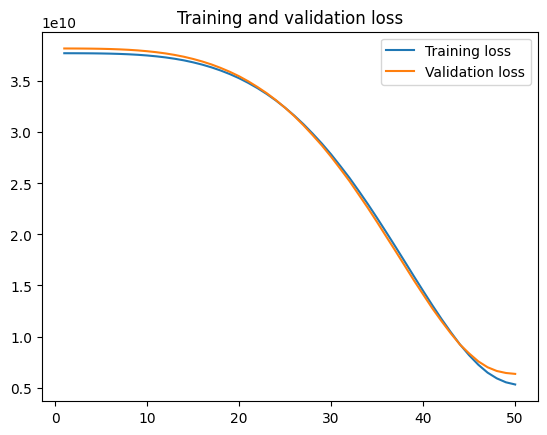

In [583]:
ames_model = setup_regression_model()
ames_history, ames_model = fit_model(ames_model, X_train, y_train, 50, 64)

score = ames_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1]) 

plot_train_validation(ames_history, ["mae"])